## Imports

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from clique_finding_models.analysis import load_experiment_results, get_exp_ids_from_sacred_dir, \
    process_exp_results_to_df

## Load configs and metrics

In [2]:
SACRED_DIR = os.path.join(os.getcwd(), "outputs", "sacred")
changing_hparams = [
    "conv_layers",
    "hidden_layers",
    "learning_rate",
]

BASELINES = [
    "mean_bl", "degree_bl", "rank_deg_bl", "rank_deg_den_bl"
]

MODEL = "chebnet"

exp_ids = get_exp_ids_from_sacred_dir(SACRED_DIR)
exp_results = [load_experiment_results(os.path.join(SACRED_DIR, str(exp_id)))
               for exp_id in exp_ids]
results = process_exp_results_to_df(exp_ids, exp_results, changing_hparams)
results = results.loc[results.model.isin(BASELINES + [MODEL]), :].reset_index()
results.head()

,index,exp_id,tag,epochs,data_set,model,train,status,transform_y,batch_size,...,val.mae,val.top5,train.frac_mc,val.avep,train.top1,learning_rate,hidden_layers,conv_layers,val.loss,train.loss
0,0,1,abs,2,small_dimacs_bhoslib,mean_bl,True,COMPLETED,none,32,...,3.611099e+00,0.704,0.654642,0.688500,0.7250,NaN,NaN,NaN,NaN,NaN
1,1,2,abs,2,small_dimacs_bhoslib,degree_bl,True,COMPLETED,none,32,...,1.292153e+00,0.928,0.855238,0.911866,0.9625,NaN,NaN,NaN,NaN,NaN
2,2,3,abs,2,small_dimacs_bhoslib,rank_deg_bl,True,COMPLETED,none,32,...,4.694500e+00,0.928,0.855238,0.911866,0.9625,NaN,NaN,NaN,NaN,NaN
3,3,4,abs,2,small_dimacs_bhoslib,rank_deg_den_bl,True,COMPLETED,none,32,...,1.247817e+07,0.946,0.872092,0.936324,0.9825,NaN,NaN,NaN,NaN,NaN
4,4,5,abs,3,small_dimacs_bhoslib,chebnet,True,COMPLETED,none,8,...,3.855981e+00,0.912,0.831401,0.911105,0.9500,0.01,2.0,3.0,18.445588,18.430995


## Best performing models overall

In [3]:
cols = ["exp_id", "model", "tag", "epochs", "val.mse", "val.frac_mc", "batch_size"] + changing_hparams
results.loc[:, "val.mse"] = results["val.mse"].round(4)
results.loc[:, "val.frac_mc"] = results["val.frac_mc"].round(4)

trained = results[cols]

trained_best = trained.loc[trained.groupby(["model", "tag"])["val.mse"].idxmin()]
trained_best.sort_values(by="val.mse", ascending=True).head(10)

,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
171,334,degree_bl,rel_mc,2,1.0693,0.8574,32,NaN,NaN,NaN
201,391,chebnet,rel_mc,3,1.5303,0.8449,8,3.0,2.0,0.001
170,333,mean_bl,rel_mc,2,1.9150,0.6884,32,NaN,NaN,NaN
1,2,degree_bl,abs,2,3.2454,0.8619,32,NaN,NaN,NaN
86,168,degree_bl,rank,2,3.2454,0.8619,32,NaN,NaN,NaN
256,500,degree_bl,rel_deg,2,3.2454,0.8619,32,NaN,NaN,NaN
286,557,chebnet,rel_deg,3,5.8309,0.8800,8,3.0,2.0,0.001
255,499,mean_bl,rel_deg,2,6.1346,0.8619,32,NaN,NaN,NaN
8,13,chebnet,abs,3,15.6532,0.8449,8,4.0,3.0,0.010
85,167,mean_bl,rank,2,16.8522,0.6884,32,NaN,NaN,NaN


(0, 9)

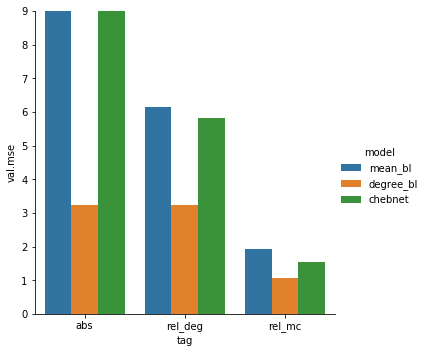

In [4]:
mse_model_order = ["mean_bl", "degree_bl", MODEL]
mse_tag_order = ["abs", "rel_deg", "rel_mc"]
grid = sns.catplot(x="tag", y="val.mse", data=trained_best, hue="model", hue_order=mse_model_order, order=mse_tag_order, kind="bar")
grid.axes[0,0].set_ylim(0,9)

In [5]:
trained_best = trained.loc[trained.groupby(["model", "tag"])["val.frac_mc"].idxmax()]
trained_best.sort_values(by="val.frac_mc", ascending=False).head(10)

,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
123,239,chebnet,rank,3,4.067090e+01,0.8996,8,5.0,3.0,0.001
173,336,rank_deg_den_bl,rel_mc,2,2.122857e+16,0.8807,32,NaN,NaN,NaN
258,502,rank_deg_den_bl,rel_deg,2,4.492407e+16,0.8807,32,NaN,NaN,NaN
265,515,chebnet,rel_deg,3,6.013600e+00,0.8806,8,5.0,2.0,0.010
207,403,chebnet,rel_mc,3,1.627300e+00,0.8804,8,5.0,2.0,0.001
88,170,rank_deg_den_bl,rank,2,1.721108e+14,0.8800,32,NaN,NaN,NaN
3,4,rank_deg_den_bl,abs,2,1.721108e+14,0.8800,32,NaN,NaN,NaN
2,3,rank_deg_bl,abs,2,2.669650e+01,0.8619,32,NaN,NaN,NaN
172,335,rank_deg_bl,rel_mc,2,1.876944e+04,0.8619,32,NaN,NaN,NaN
257,501,rank_deg_bl,rel_deg,2,4.135464e+04,0.8619,32,NaN,NaN,NaN


(0.65, 0.95)

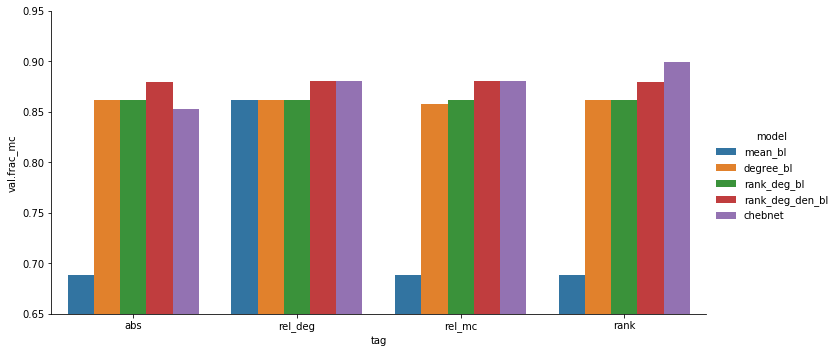

In [6]:
rank_model_order = ["mean_bl", "degree_bl", "rank_deg_bl", "rank_deg_den_bl", MODEL]
rank_tag_order = ["abs", "rel_deg", "rel_mc", "rank"]
grid = sns.catplot(x="tag", y="val.frac_mc", data=trained_best, 
                   hue="model", hue_order=rank_model_order, order=rank_tag_order, 
                   kind="bar", aspect=2)
grid.axes[0,0].set_ylim(0.65, 0.95)

## Best variants for type

### Abs

In [7]:
best = results[(results.tag == "abs")][cols].sort_values(by="val.mse", ascending=True).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,1,2,degree_bl,abs,2,3.2454,0.8619,32,NaN,NaN,NaN
1,8,13,chebnet,abs,3,15.6532,0.8449,8,4.0,3.0,0.010
2,12,21,chebnet,abs,3,16.0024,0.8533,8,5.0,4.0,0.010
3,34,65,chebnet,abs,3,16.0622,0.8449,8,4.0,2.0,0.001
4,24,45,chebnet,abs,3,16.1008,0.8463,32,3.0,4.0,0.010
5,31,59,chebnet,abs,3,16.1209,0.8454,8,3.0,2.0,0.001
6,19,35,chebnet,abs,3,16.1223,0.8475,16,5.0,2.0,0.010
7,33,63,chebnet,abs,3,16.1389,0.8449,8,3.0,4.0,0.001
8,16,29,chebnet,abs,3,16.1420,0.8463,16,4.0,2.0,0.010
9,46,89,chebnet,abs,3,16.1497,0.8482,16,5.0,2.0,0.001


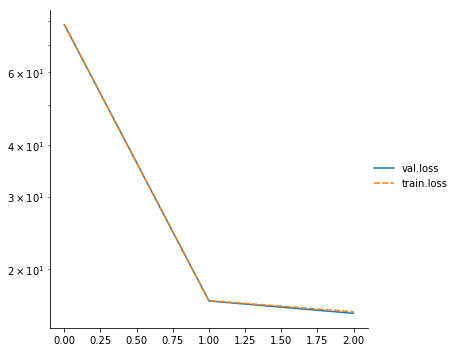

In [8]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

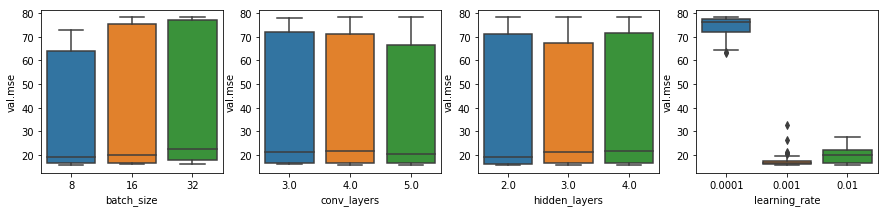

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "abs") & (results.model == MODEL)],
                x=axis, y="val.mse", ax=axes[i])

### Rel deg.

In [10]:
best = results[(results.tag == "rel_deg")][cols].sort_values(by="val.mse", ascending=True).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,256,500,degree_bl,rel_deg,2,3.2454,0.8619,32,NaN,NaN,NaN
1,286,557,chebnet,rel_deg,3,5.8309,0.8800,8,3.0,2.0,0.001
2,274,533,chebnet,rel_deg,3,5.8357,0.8800,16,5.0,2.0,0.010
3,268,521,chebnet,rel_deg,3,5.8475,0.8800,16,3.0,2.0,0.010
4,289,563,chebnet,rel_deg,3,5.9721,0.8800,8,4.0,2.0,0.001
5,266,517,chebnet,rel_deg,3,5.9901,0.8670,8,5.0,3.0,0.010
6,265,515,chebnet,rel_deg,3,6.0136,0.8806,8,5.0,2.0,0.010
7,292,569,chebnet,rel_deg,3,6.0193,0.8789,8,5.0,2.0,0.001
8,260,505,chebnet,rel_deg,3,6.0261,0.8513,8,3.0,3.0,0.010
9,305,595,chebnet,rel_deg,3,6.0314,0.8461,32,3.0,3.0,0.001


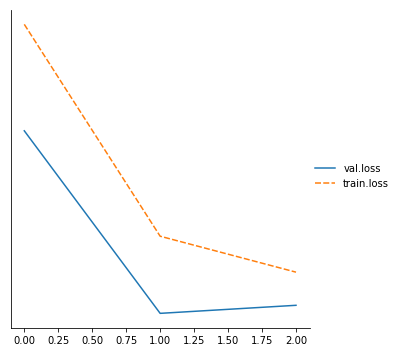

In [11]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

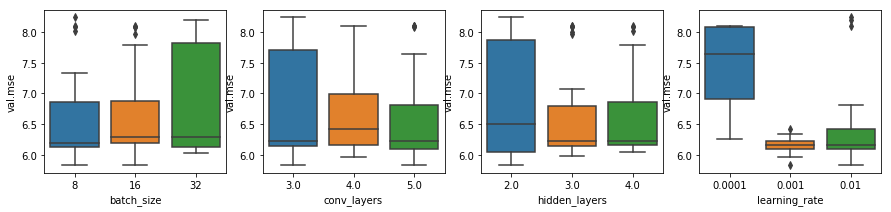

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rel_deg") & (results.model == MODEL)],
                x=axis, y="val.mse", ax=axes[i])

### Rel MC

In [13]:
best = results[(results.tag == "rel_mc")][cols].sort_values(by="val.mse", ascending=True).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,171,334,degree_bl,rel_mc,2,1.0693,0.8574,32,NaN,NaN,NaN
1,201,391,chebnet,rel_mc,3,1.5303,0.8449,8,3.0,2.0,0.001
2,203,395,chebnet,rel_mc,3,1.5585,0.8449,8,3.0,4.0,0.001
3,205,399,chebnet,rel_mc,3,1.5632,0.8476,8,4.0,3.0,0.001
4,224,437,chebnet,rel_mc,3,1.5883,0.8449,32,4.0,4.0,0.001
5,204,397,chebnet,rel_mc,3,1.5951,0.8485,8,4.0,2.0,0.001
6,207,403,chebnet,rel_mc,3,1.6273,0.8804,8,5.0,2.0,0.001
7,202,393,chebnet,rel_mc,3,1.6389,0.8449,8,3.0,3.0,0.001
8,209,407,chebnet,rel_mc,3,1.6413,0.8485,8,5.0,4.0,0.001
9,214,417,chebnet,rel_mc,3,1.7023,0.8468,16,4.0,3.0,0.001


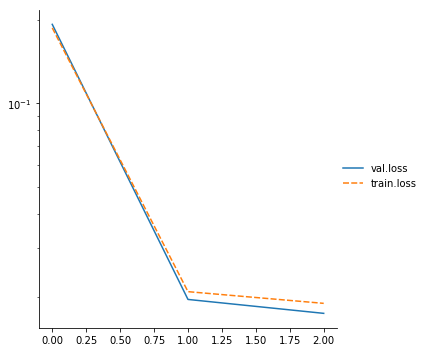

In [14]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

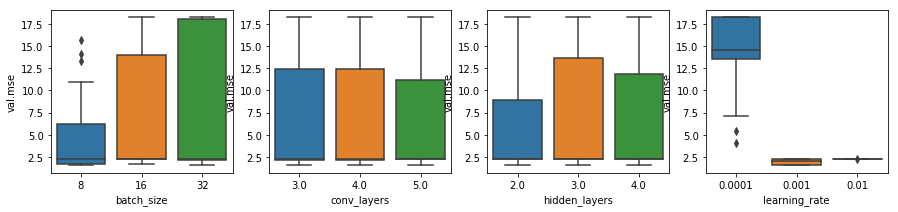

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rel_mc") & (results.model == MODEL)],
                x=axis, y="val.mse", ax=axes[i])

### Rank

In [16]:
best = results[(results.tag == "rank")][cols].sort_values(by="val.frac_mc", ascending=False).head(10).reset_index()
best

,index,exp_id,model,tag,epochs,val.mse,val.frac_mc,batch_size,conv_layers,hidden_layers,learning_rate
0,123,239,chebnet,rank,3,40.6709,0.8996,8,5.0,3.0,0.001
1,93,179,chebnet,rank,3,39.7537,0.8990,8,4.0,3.0,0.010
2,105,203,chebnet,rank,3,23.2445,0.8948,16,5.0,3.0,0.010
3,95,183,chebnet,rank,3,38.5025,0.8939,8,5.0,2.0,0.010
4,99,191,chebnet,rank,3,24.3710,0.8937,16,3.0,3.0,0.010
5,97,187,chebnet,rank,3,29.8176,0.8929,8,5.0,4.0,0.010
6,94,181,chebnet,rank,3,35.2553,0.8926,8,4.0,4.0,0.010
7,111,215,chebnet,rank,3,51.1173,0.8902,32,4.0,3.0,0.010
8,106,205,chebnet,rank,3,24.1255,0.8891,16,5.0,4.0,0.010
9,110,213,chebnet,rank,3,31.2763,0.8884,32,4.0,2.0,0.010


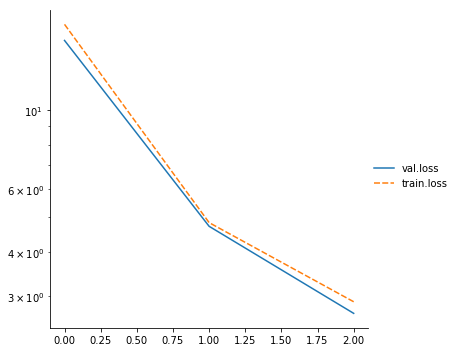

In [17]:
eid = [int(best.iloc[i]["exp_id"]) 
       for i in range(10) if best.loc[i]["model"] == MODEL][0]
grid = sns.relplot(data=exp_results[eid - 1][1][["val.loss", "train.loss"]], kind="line")
grid.set(yscale="log")

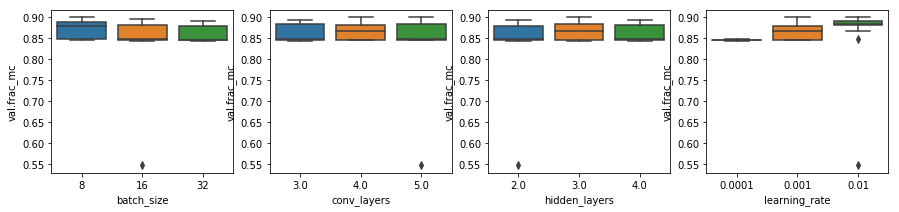

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rank") & (results.model == MODEL)],
                x=axis, y="val.frac_mc", ax=axes[i])

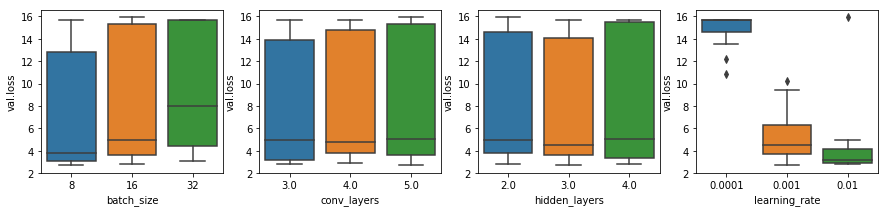

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for i, axis in enumerate(["batch_size", "conv_layers", "hidden_layers", "learning_rate"]):
    sns.boxplot(data=results[(results.tag == "rank") & (results.model == MODEL)],
                x=axis, y="val.loss", ax=axes[i])